<a href="https://colab.research.google.com/github/ashishshaji/Natural_language_processing_projects/blob/master/spam%20sms/spam_sms_classification_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAM MESSAGE CLASSIFICATION 
![](https://appliedmachinelearning.files.wordpress.com/2017/01/spam-filter.png?w=620)
Classifiying messages into spam or not spam by natural language processing using deep  learning
the below model is able to attain accuracy around 98.6% in classification

# load and read the dataset

In [ ]:
#importing libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")


In [ ]:
sms = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv',encoding='latin1')
sms = sms.iloc[:,[0,1]]
sms.columns = ["label", "message"]
sms.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.shape

(5572, 2)

# Exploratory Data Analysis


Lets find  the number of spam message and ham messages in the dataset using visualization.747 spam messages are found out of 5572 messages

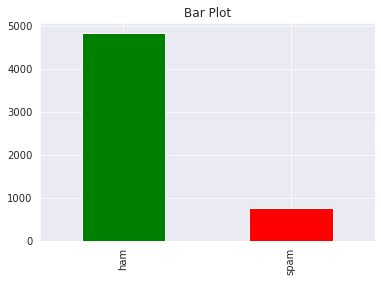

In [ ]:
count_Class=pd.value_counts(sms["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show();

In [ ]:
#747 spam messages  are there
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

lets add another coloumn length for storing the length of each message .It will help us to find the lengths of the messages as well as we can compare the length of spam and ham by vizualisation techinques

In [ ]:
#lets add length coloumn to the data
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


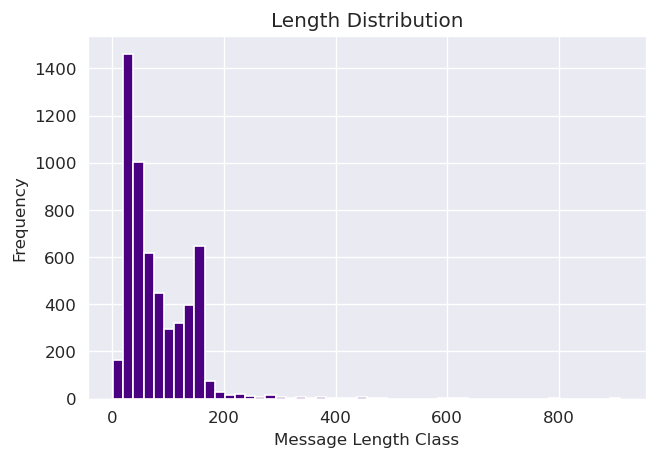

In [ ]:

fig = plt.figure(dpi = 120)
ax = plt.axes()
sms['length'].plot(bins=50, kind='hist',ax=ax,color = 'indigo')
ax.set(xlabel = 'Message Length Class',ylabel = 'Frequency',title = 'Length Distribution');


Text(0.5, 0, 'Message Length')

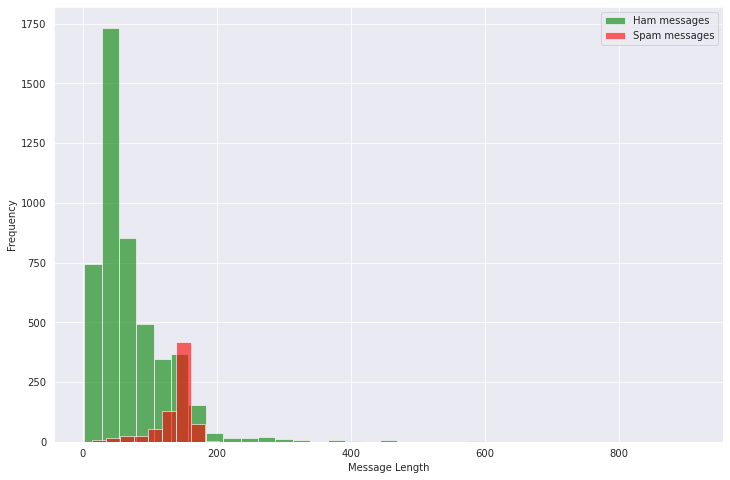

In [ ]:
# comparison of spam and ham messages   
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].length.plot(bins=35, kind='hist', color='green', 
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].length.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

Lets visualize the most commen words used in both spam and ham messages

In [ ]:
from collections import Counter

count1 = Counter(" ".join(sms[sms['label']=='ham']["message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(sms[sms['label']=='spam']["message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

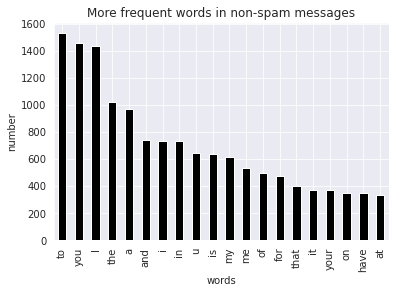

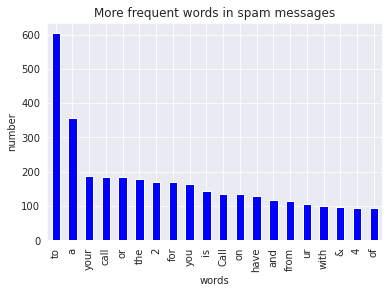

In [ ]:
df1.plot.bar(legend = False,color="black")
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


df2.plot.bar(legend = False, color = 'blue')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


randomaly checking a message in the dataset


In [ ]:
#randomaly checking a message
sms[sms.length == 200].message.iloc[0]


'Open rebtel with firefox. When it loads just put plus sign in the user name place, and it will show you two numbers. The lower number is my number. Once you pick that number the pin will display okay!'

## Text preproccessing

In [ ]:
#importing libaries required
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.models import Sequential
from keras.utils import to_categorical


Using TensorFlow backend.


In [ ]:
vocab_size = 400
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 16


Replacing the catogorical values in such a way that spam as 1 and ham as 0.

In [ ]:
encode = ({'ham': 0, 'spam': 1} )
#new dataset with replaced values
sms = sms.replace(encode)

In [ ]:
sms.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:

X = sms['message']
Y = sms['label']


In [ ]:

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)
# convert to sequence of integers
X = tokenizer.texts_to_sequences(X)

In [ ]:
X = np.array(X)
y = np.array(Y)


In [ ]:
from keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen=max_length)


 spliting the data as training and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=7)


# Model


In [ ]:

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 16)           6400      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 6,833
Trainable params: 6,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test,y_test), verbose=2)

Epoch 1/30
131/131 - 1s - loss: 0.5430 - accuracy: 0.8545 - val_loss: 0.3932 - val_accuracy: 0.8693
Epoch 2/30
131/131 - 0s - loss: 0.3849 - accuracy: 0.8648 - val_loss: 0.3700 - val_accuracy: 0.8693
Epoch 3/30
131/131 - 0s - loss: 0.3735 - accuracy: 0.8648 - val_loss: 0.3596 - val_accuracy: 0.8693
Epoch 4/30
131/131 - 0s - loss: 0.3611 - accuracy: 0.8648 - val_loss: 0.3449 - val_accuracy: 0.8693
Epoch 5/30
131/131 - 0s - loss: 0.3394 - accuracy: 0.8648 - val_loss: 0.3156 - val_accuracy: 0.8693
Epoch 6/30
131/131 - 0s - loss: 0.2953 - accuracy: 0.8638 - val_loss: 0.2546 - val_accuracy: 0.8679
Epoch 7/30
131/131 - 0s - loss: 0.2230 - accuracy: 0.8957 - val_loss: 0.1823 - val_accuracy: 0.9203
Epoch 8/30
131/131 - 0s - loss: 0.1660 - accuracy: 0.9445 - val_loss: 0.1391 - val_accuracy: 0.9576
Epoch 9/30
131/131 - 0s - loss: 0.1353 - accuracy: 0.9567 - val_loss: 0.1169 - val_accuracy: 0.9627
Epoch 10/30
131/131 - 0s - loss: 0.1184 - accuracy: 0.9631 - val_loss: 0.1050 - val_accuracy: 0.9627

In [ ]:
result = model.evaluate(X_test, y_test)
# extract those
loss = result[0]
accuracy = result[1]


print(f"[+] Accuracy: {accuracy*100:.2f}%")


44/44 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9842
[+] Accuracy: 98.42%


# predictions

In [ ]:
from keras.preprocessing import sequence


In [ ]:
def get_predictions(txts):
    txts = tokenizer.texts_to_sequences(txts)
    txts = sequence.pad_sequences(txts, maxlen=max_length)
    preds = model.predict(txts)
    if(preds[0] > 0.5):
        print("SPAM MESSAGE")
        
    else:
        print('NOT SPAM')

    

lets check 2 messages one is a spam and the other one is not spam 

In [ ]:
# Spam message
txts=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005"]

get_predictions(txts)

SPAM MESSAGE


In [ ]:
#not Spam
txts = ["Hi man, I was wondering if we can meet tomorrow."]
get_predictions(txts)

NOT SPAM


> Our model is succesfully classifying the messages into 2 classes
# Thanks for reading my notebook .If you like my work,please upvote it !